### Welcome to the Southern Water Corp Python Case Study!

While working on the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data.

You might have realised that while Excel is powerful, it was a bit tricky to use for visualizations like Box Plots, multiple line plots and in general, there are challenges that arise when doing quick analysis.

In this Case Study, you're going to *revisit* the Pump Data, with a few different questions that help you see how you can use Python to speed up your analysis. You'll also witness how powerful Python's plotting and modelling libraries can be! 


**Please note that this case study is composed of two parts.** Once you have completed Part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to Part 2. 

<H3>  Time to get started! </H3>

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the following libraries: 

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study. We encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. 

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import warnings
warnings.filterwarnings('ignore')

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data you've received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data you will need for your analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data you will need for Question 10 onwards.

We have **deliberately** set up the data in this manner so please ensure that when you need to perform the rolling standard deviation calculations, you use the **DF_Rolling_Stdev.csv** file.

<b> Please complete the following below: </b>

i. Import each of the two data sources and store them into their individual DataFrames. 

We suggest you use the names : **dataframe_raw & dataframe_stdev respectively.**. 

ii. Print descriptive statistics for each of the DataFrames using **.describe()** and **.info()**

In [3]:
dataframe_raw = pd.read_csv('C:\Data Analytics\Python\Southern_Water_Corp_Case_Study\DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('C:\Data Analytics\Python\Southern_Water_Corp_Case_Study\DF_Rolling_Stdev.csv')

In [108]:
dataframe_raw.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


In [109]:
dataframe_stdev.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.00000,2452.000000,2452.000000
mean,1.485126,1.497361,6.648308,13.945338,3.436370,0.37060,2.725232,0.021207
std,2.294950,2.282053,5.722897,12.394302,3.043042,0.29979,4.186723,0.144104
min,0.380000,0.640000,0.580000,5.000000,0.900000,0.11000,1.170000,0.000000
25%,1.070000,1.080000,5.520000,11.210000,2.920000,0.28000,1.960000,0.000000
50%,1.160000,1.170000,5.990000,12.180000,3.160000,0.32000,2.120000,0.000000
75%,1.230000,1.260000,6.460000,13.110000,3.370000,0.36000,2.270000,0.000000
max,21.390000,21.530000,59.310000,124.710000,30.650000,3.32000,39.150000,1.000000


In [6]:
dataframe_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-null   float64
 3   Volumetric Flow Meter 2  2453 non-null   float64
 4   Pump Speed (RPM)         2453 non-null   int64  
 5   Pump Torque              2453 non-null   int64  
 6   Ambient Temperature      2453 non-null   int64  
 7   Horse Power              2453 non-null   float64
 8   Pump Efficiency          2453 non-null   float64
 9   PUMP FAILURE (1 or 0)    2453 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 191.8+ KB


In [111]:
dataframe_stdev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2452 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2452 non-null   object 
 2   Volumetric Flow Meter 1  2452 non-null   float64
 3   Volumetric Flow Meter 2  2452 non-null   float64
 4   Pump Speed (RPM)         2452 non-null   float64
 5   Pump Torque              2452 non-null   float64
 6   Ambient Temperature      2452 non-null   float64
 7   Horse Power              2452 non-null   float64
 8   Pump Efficiency          2452 non-null   float64
 9   PUMP FAILURE (1 or 0)    2452 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 191.7+ KB


### Step 3: <span style="color:green">Create a Boxplot</span> 

When you look at your dataframe, you should be able to see the upper and lower quartiles for each row of data from when you used **.describe**.

This gives you an understanding of the number of entires in each dataset (~2,452). 

<H3> <span style="color:green"> Please repeat these steps for both the dataframe_raw dataset and the dataframe_stdev dataset </span></H3> 

i) Using the DataFrame, create a boxplot visualising this data.

ii) Using the DataFrame, create a lineplot visualising this data.

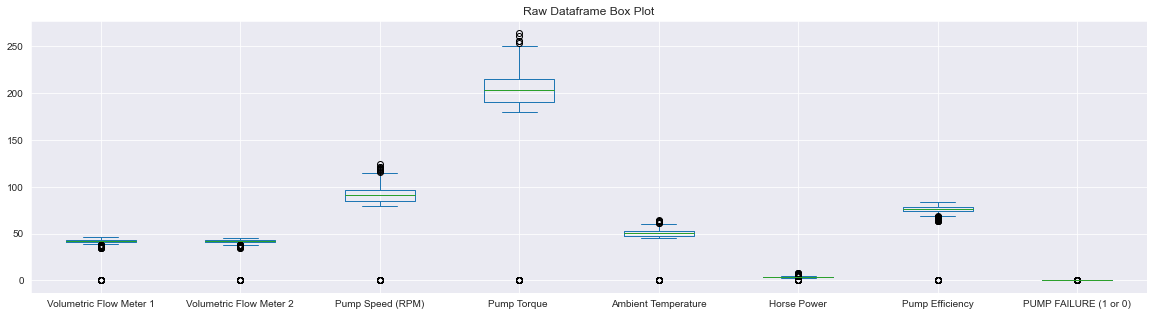

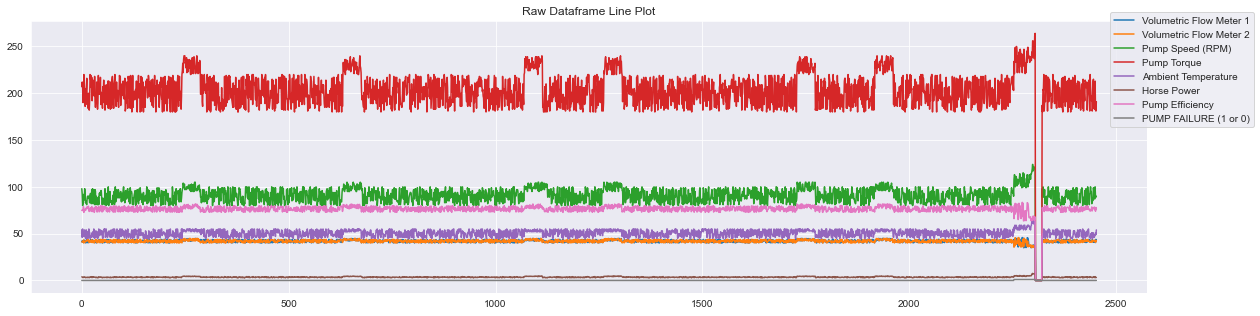

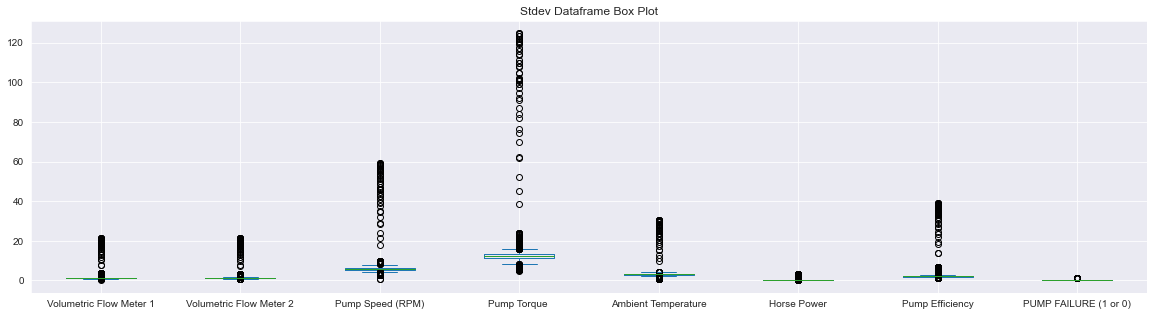

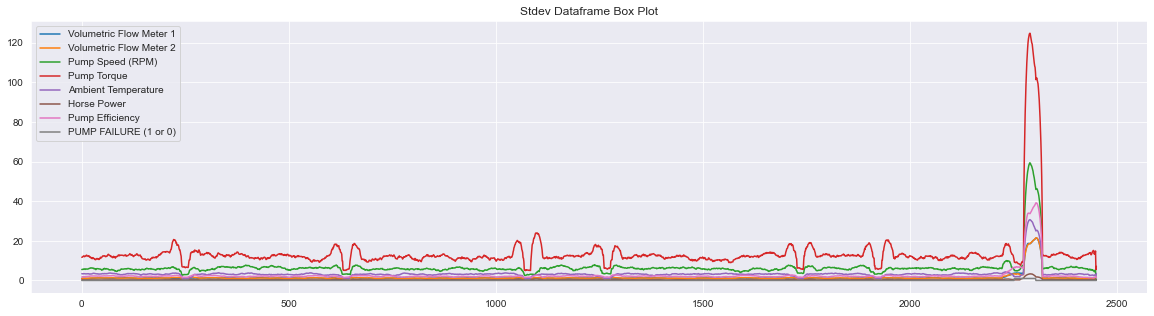

In [7]:
dataframe_raw.plot(kind='box', title="Raw Dataframe Box Plot")
plt.show()

dataframe_raw.plot(kind='line', title="Raw Dataframe Line Plot")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

dataframe_stdev.plot(kind='box', title="Stdev Dataframe Box Plot")
plt.show()

dataframe_stdev.plot(kind='line', title="Stdev Dataframe Box Plot")
plt.show()

**What have you observed from the boxplot and line plots for both the dataframe_raw and dataframe_stdev datasets?**

Looking at the Raw Dataframe Box plot, we can observe the greater variability for the Pump Speed and Pump Torque. On the other hand, there is a smaller variability for Volumetric Flow Meter 1, Volumetric Flow Meter 2, Ambient Temperature, Horse Power, Pump Efficiency and Pump Failure.

By looking at the Stdev Dataframe Box plot, we can observe that there is a smaller variability as well as larger outliers for Pump Speed, Pump Torque, Ambient Temperature, and Pump Efficiency.

From both Raw Dataframe and Stdev Dataframe line graphs - we can clearly see the spike up for all the variables at the event of pump failure.

### Step 4: <span style="color:green">Filtered DataFrames with Box Plots</span> 

You would have noted the datasets we have contain a Pump Failure (1 or 0) Variable that indicate whether the pump is failing (1) or whether the pump is behaving normally (0).  
    
It is very likely you will see differences in the overall populations of Pre-Failure vs. Post Failure.
To visualise this difference, you should separate your datasets, filtering for when the Pump Failure = 0 or when the Pump Failure = 1, and see what trends emerge. 
    
This will require you to <b> SUBSET </b> your dataframe using *boolean filters*.

<H3> <span style="color:green"> Please repeat these steps for both the dataframe_raw dataset and the dataframe_stdev dataset </span></H3> 

i) Using the dataframe_raw dataset, create two boxplots specifically for when the pump has failed and when the pump is working normally. 

As part of best practice, don't forget to clearly title your box plots so we can identify which plot is for the failure and which plot is for the normal operations.

To do this, you'll have to recall how to apply **boolean** filtering to a dataframe. If you're not sure how to do this, re-read the hints we've given above and pay careful attention to the syntax we've shown.



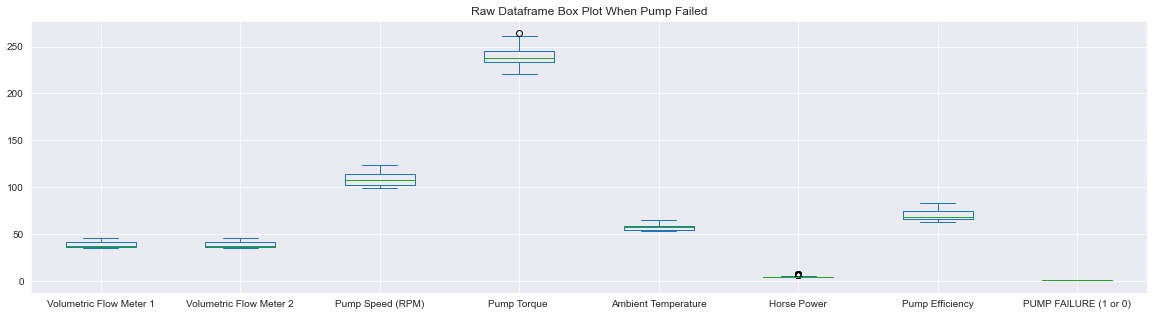

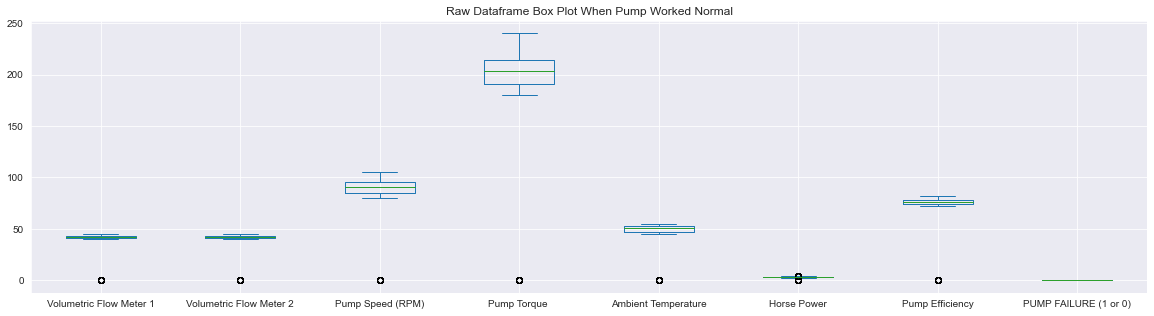

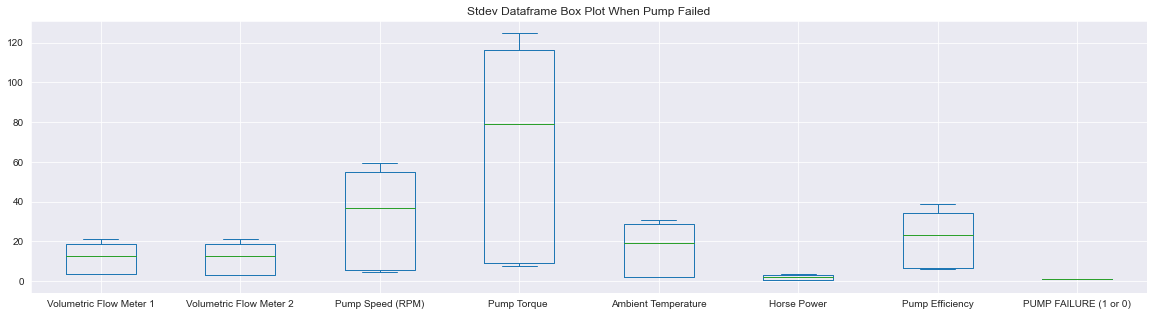

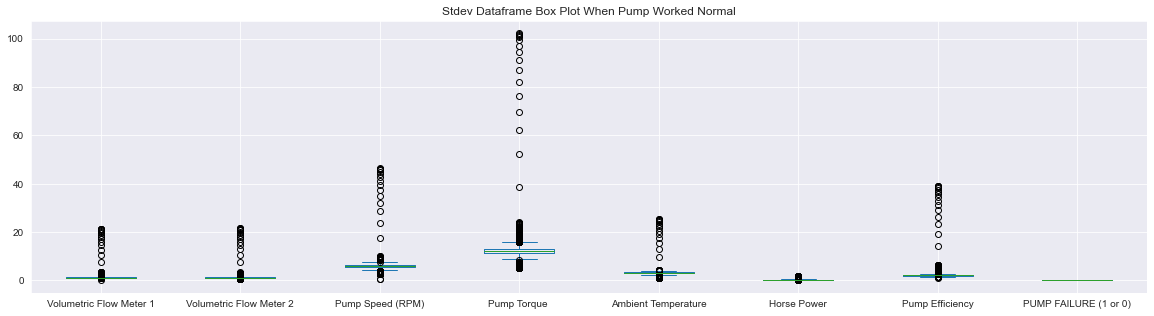

In [113]:
pumpfailurerawyes = dataframe_raw['PUMP FAILURE (1 or 0)']==1
dataframe_rawyes = dataframe_raw[pumpfailurerawyes]
dataframe_rawyes.plot(kind='box')
plt.title("Raw Dataframe Box Plot When Pump Failed")
plt.show()

pumpfailurerawno = dataframe_raw['PUMP FAILURE (1 or 0)']==0
dataframe_rawno = dataframe_raw[pumpfailurerawno]
dataframe_rawno.plot(kind='box')
plt.title("Raw Dataframe Box Plot When Pump Worked Normal")
plt.show()

pumpfailurestdevyes = dataframe_stdev['PUMP FAILURE (1 or 0)']==1
dataframe_stdevyes = dataframe_stdev[pumpfailurestdevyes]
dataframe_stdevyes.plot(kind='box')
plt.title("Stdev Dataframe Box Plot When Pump Failed")
plt.show()

pumpfailurestdevno = dataframe_stdev['PUMP FAILURE (1 or 0)']==0
dataframe_stdevno = dataframe_stdev[pumpfailurestdevno]
dataframe_stdevno.plot(kind='box')
plt.title("Stdev Dataframe Box Plot When Pump Worked Normal")
plt.show()

<h3> What have you noticed when you compared the dataset in this manner? </h3>

When looking at the Raw Datafram Box plot graph, We can observe that the Pump Speed and Pump Torque were high when pump got failed compared to when pump worked normal.

When looking at the Stdev Datafram Box plot graph, We can observe greater variability for the Volumetric Flow Meter 1, Volumetric Flow Meter 2, Pump Speed, Pump Torque, Ambient Temperature and Pump Efficiency when pump got failed compared to when pump worked normal.

A quick analysis might show-case there are many *outliers* that exist in your dataset.

As you all know, outliers can easily *skew* your analysis. You might want to remove them.

The general logic for removing an outliers is:

<b> Any Value that is either Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR is considered an outlier. </b>

Where Q1 = Quartile 1 and Q3 = Quartile 3

Let's break these down to a few simple steps and tackle how to calculate this.

1. Define the Quartiles Q1 and Q3. 
2. Calculate the Interquartile Range (Q3 - Q1)
3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
4. Using Boolean Subsetting, filter the DataFrame for outliers and remove them.
5. Calculate what the proportion of outliers exist (i.e. Number of entries left after outlier removal / Number of total entries in dataset). 


### Step 5: <span style="color:green">Create Quartiles</span> 

Create two new variables called Q1 and Q3 using the dataframe_raw dataset. 

i)  <b> Q1 should contain the 25th percentile for all columns in the DataFrame. Q3 should contain the 75th percentile  for all the columns in the DataFrame.</b>

ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the DataFrame and print it to the screen.

In [114]:
Q1 = dataframe_raw.quantile(0.25)
Q3 = dataframe_raw.quantile(0.75)
    
IQR = Q3 - Q1
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


### Step 6: <span style="color:green">Identify Outliers</span> 

Continuing in from Step 5 - we still need to calculate how we can remove our outliers.

We're aware of the overall formula as shown per below.

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

Now work out how to identify these outliers step by step. 

<b> i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:</b>
<p>
<li> Lower_Limit = Q1 - 1.5 * IQR </li>
<li> Upper_Limit = Q3 + 1.5 * IQR </li> 
   
<b> ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the DataFrame to include *only* the outliers. 

In [115]:
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

outliers = dataframe_raw[(((dataframe_raw < Lower_Limit)|((dataframe_raw > Upper_Limit))).any(axis=1))]

### Step 7: <span style="color:green">Create a box plot without outliers</span> 

i) Create a new DataFrame called no_outliers and using the ~ operator, remove all the outliers from the DataFrame <p>
ii) Using the no_outliers dataframe, create two box plots as per below: <p>
    <li> A boxplot when PUMP FAILURE is 1 (Failure) </li>
    <li> A boxplot when PUMP FAILURE is 0 (Normal Behaviour) </li>

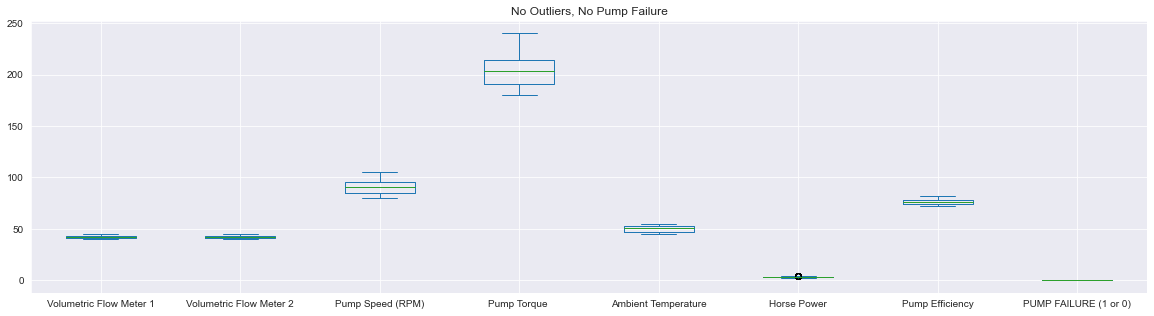

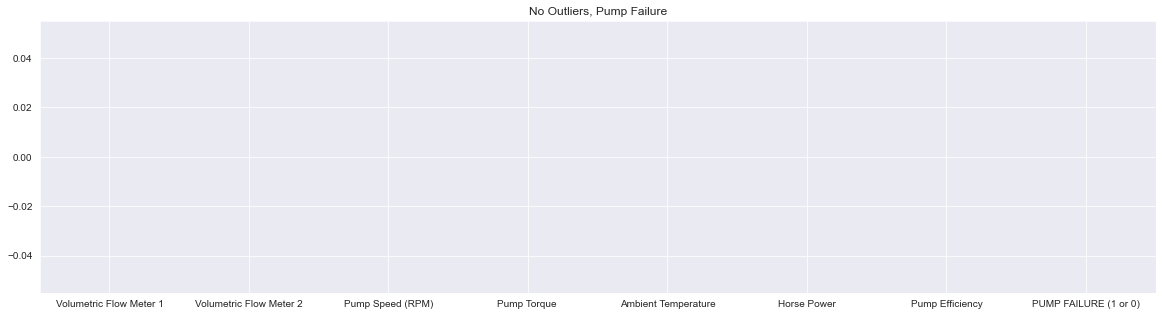

In [116]:
import warnings
warnings.filterwarnings('ignore')

no_outliers = dataframe_raw[~(((dataframe_raw < Lower_Limit)|((dataframe_raw > Upper_Limit))).any(axis=1))]

#no_outliers
pumpworked = no_outliers['PUMP FAILURE (1 or 0)']== 0
pumpworkedout = no_outliers[pumpworked]
pumpworkedout.plot(kind='box')
plt.title("No Outliers, No Pump Failure")
plt.show()

pumpfailed = no_outliers['PUMP FAILURE (1 or 0)']== 1
pumpfailedout = no_outliers[pumpfailed]
pumpfailedout.plot(kind='box')
plt.title("No Outliers, Pump Failure")
plt.show()

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

As you might recall from the earlier plot you had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is common when variables are at different scales, the trends can be more challenging to interpret. This is why we are going to ITERATE through the DataFrame, plot each individual variable out, and compare this with the Pump Failure for a more streamlined analysis.

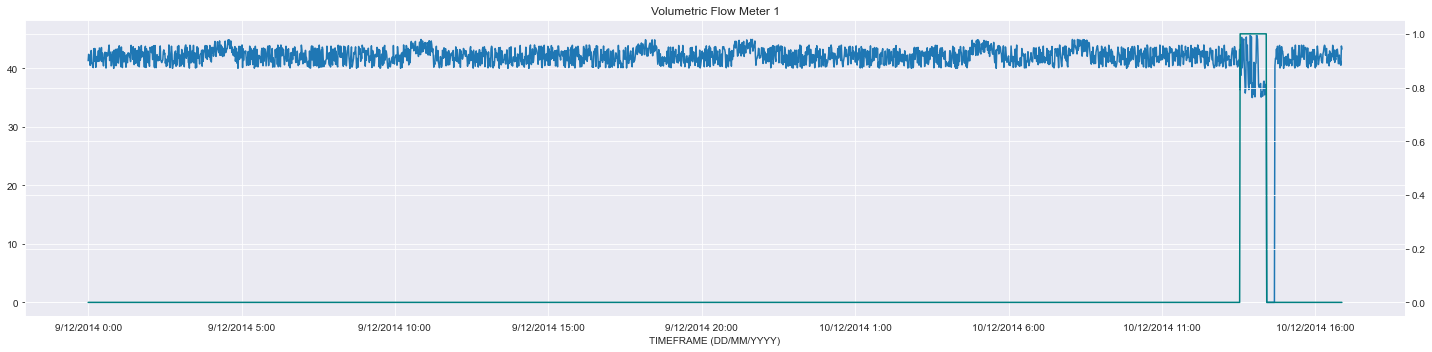

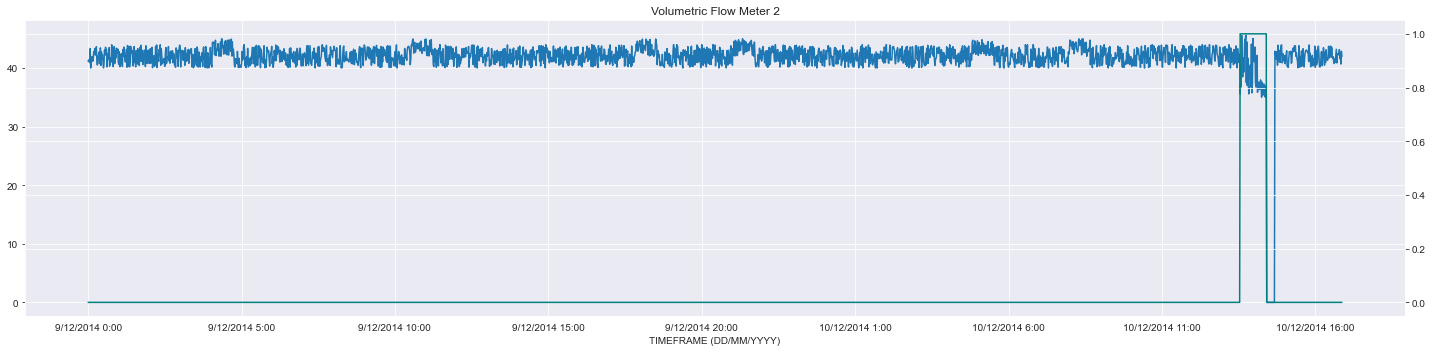

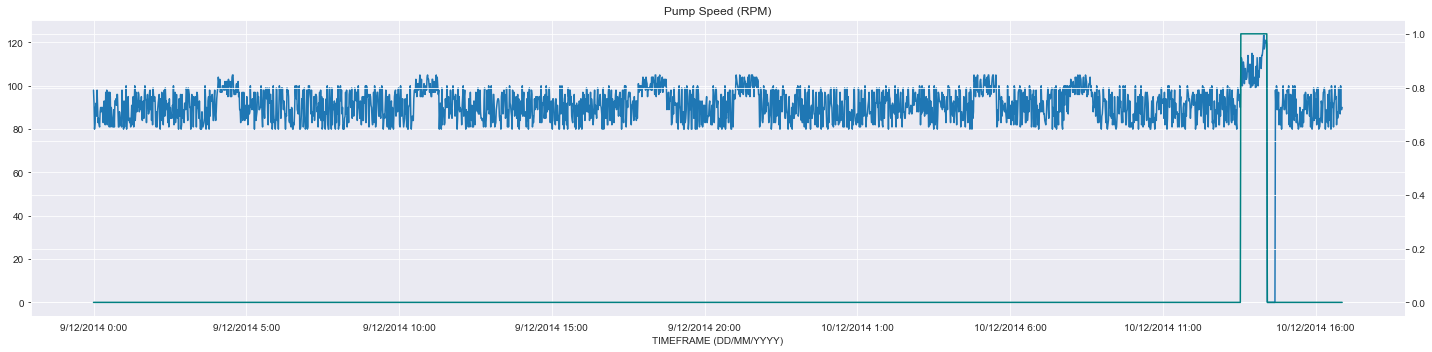

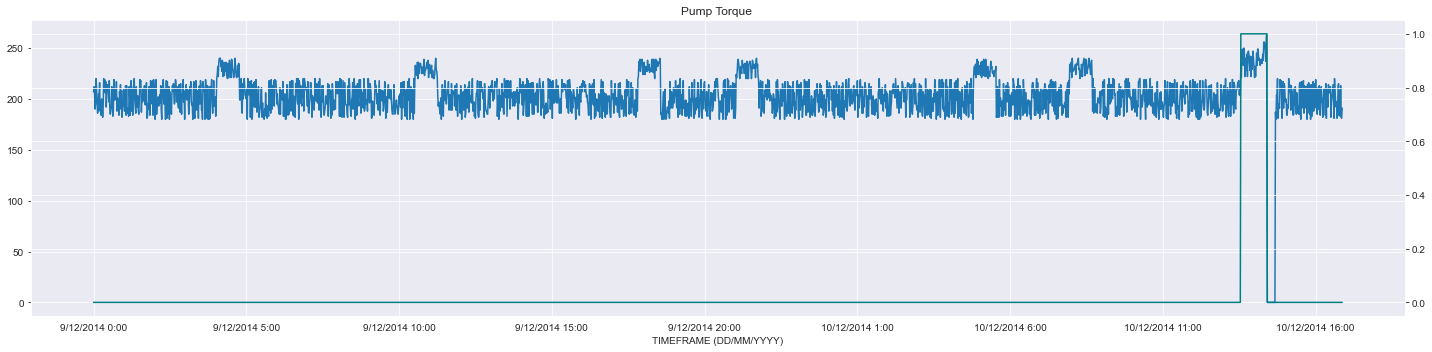

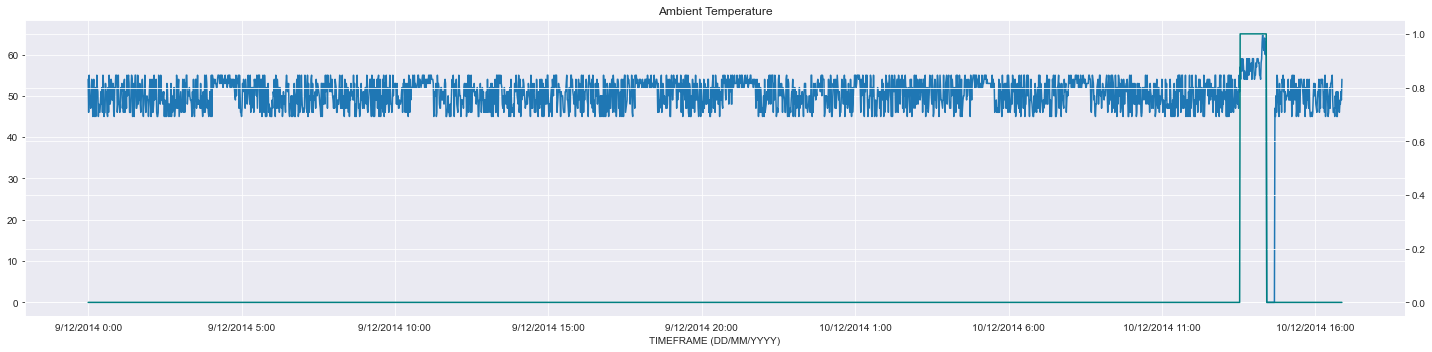

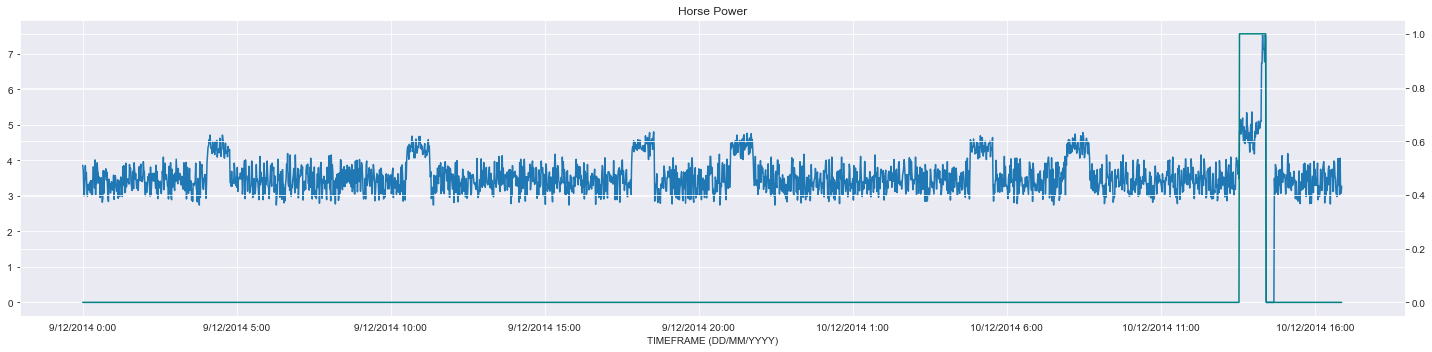

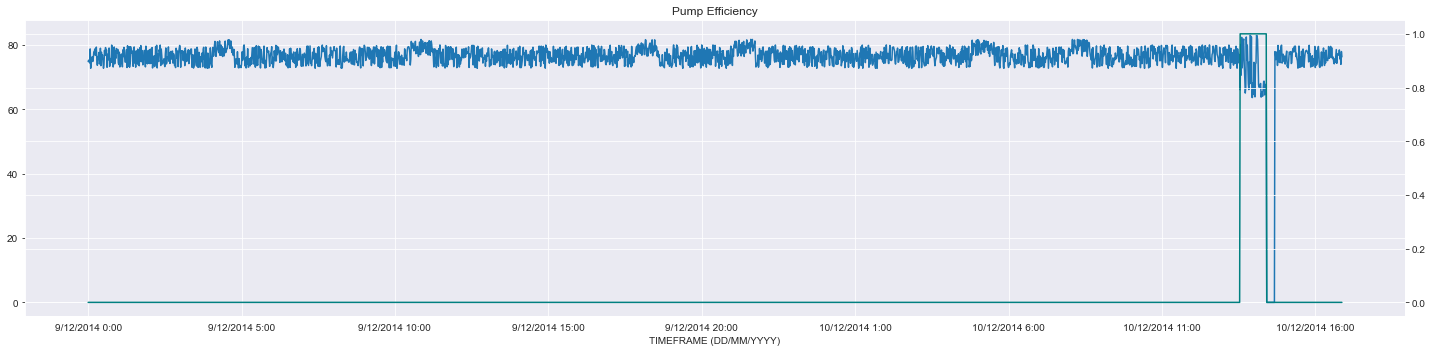

In [4]:
ListOfVariables=['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']

dataframe_raw.set_index('TIMEFRAME (DD/MM/YYYY)', inplace=True)

for item in ListOfVariables:
    fig,ax1=plt.subplots()
    ax1.set_xlabel('TIMEFRAME (DD/MM/YYYY)')
    ax1.plot(dataframe_raw[item]) #Looping through every item in the dataframe
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax2=ax1.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
    ax2.plot(dataframe_raw['PUMP FAILURE (1 or 0)'],color='teal')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(item)
    fig.tight_layout()
    plt.show()

<b> Have you noticed any particular trends when looking at the data in this way? Has it made it easier to see which variables *might* be reacting more strongly to the Pump Failure than others? </b> 

By looking at the above graphs, we can clearly see that Pump Speed (RPM), Pump Torque, Ambient Temperature and Horse Power are reacting to the Pump Failure.

Now that you've iterated through the dataframe_raw, we're going to do something similar with the dataframe_stdev dataset.

In these next few exercises you'll be seeking to better understand how to make use of Pythons Powerful Inferential Statistics and Plotting libraries to Zoom In on periods of interest that you'd like to examinate further.

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index of the dataframe_stdev** dataset to the TIMEFRAME (DD/MM/YYYY) attribute.

ii) Using the List_Of_Variables you created in Step 8, Re-plot all the numerical variables in the dataframe_stdev for the following time periods:
     10/12/2014 12:00 to 10/12/2014 14:30.

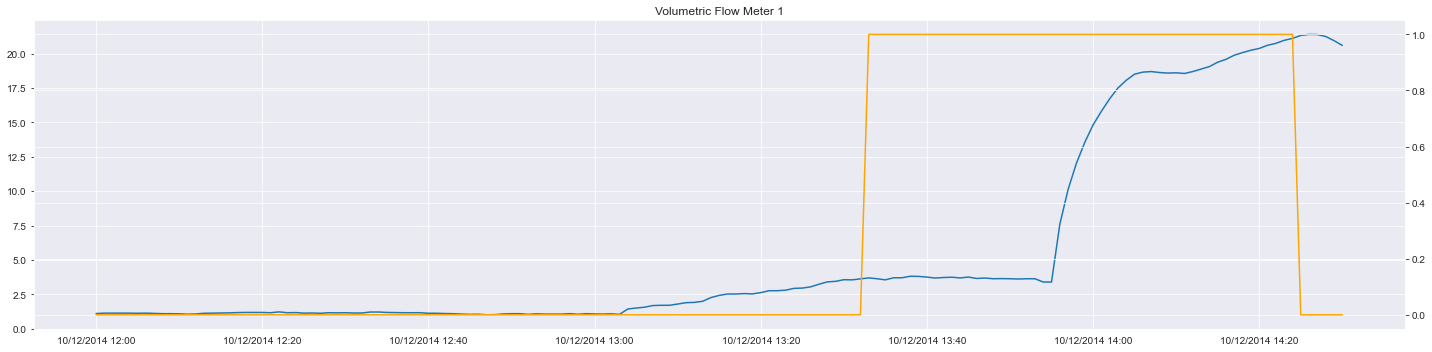

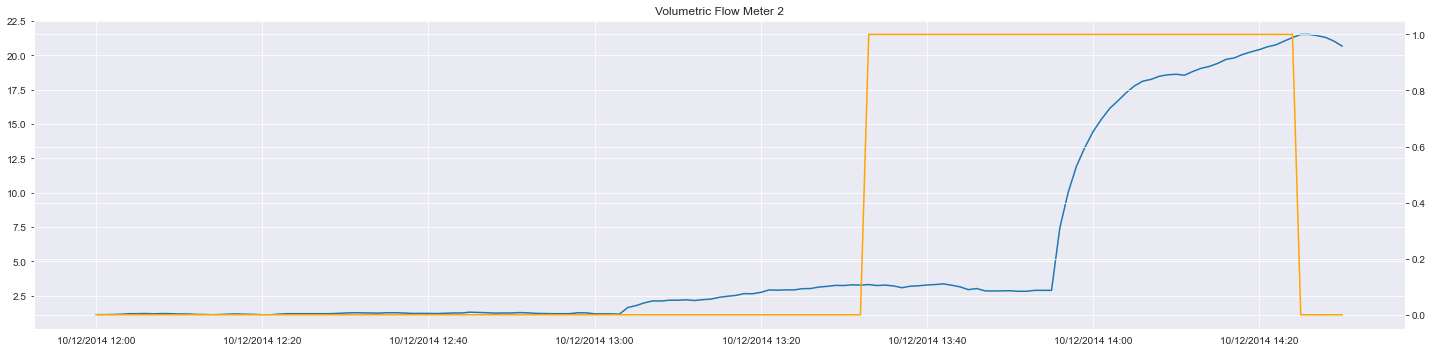

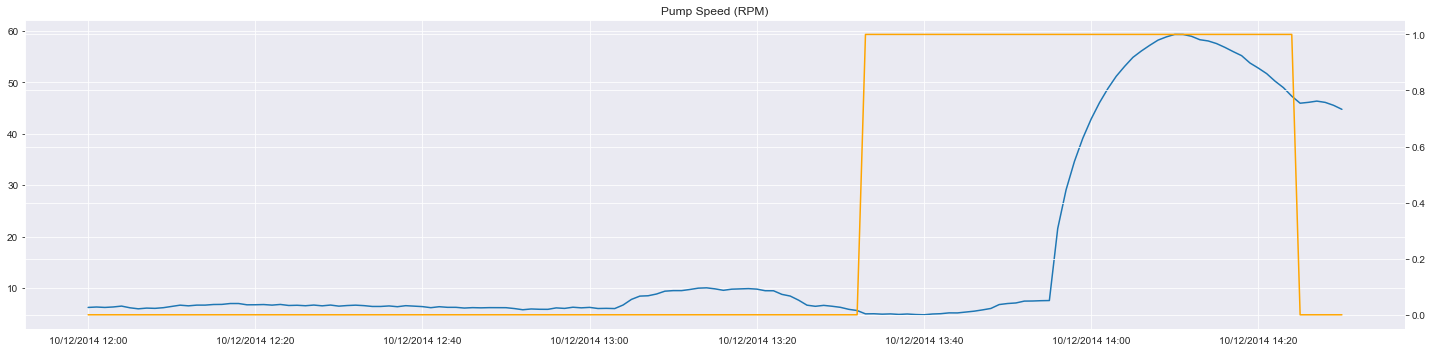

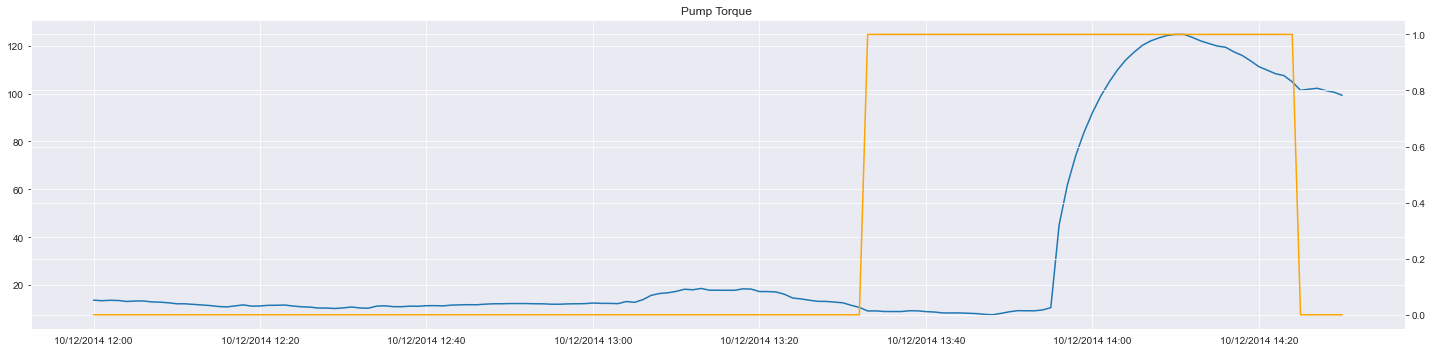

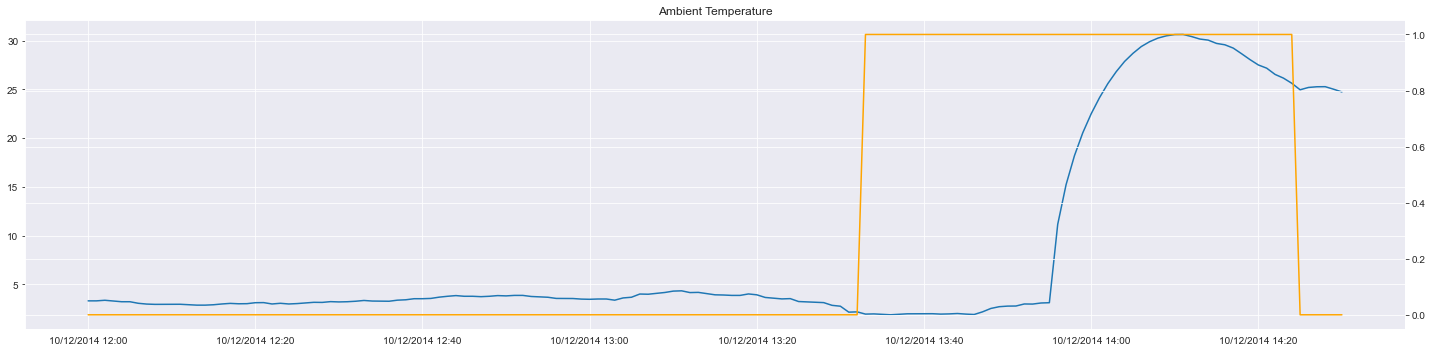

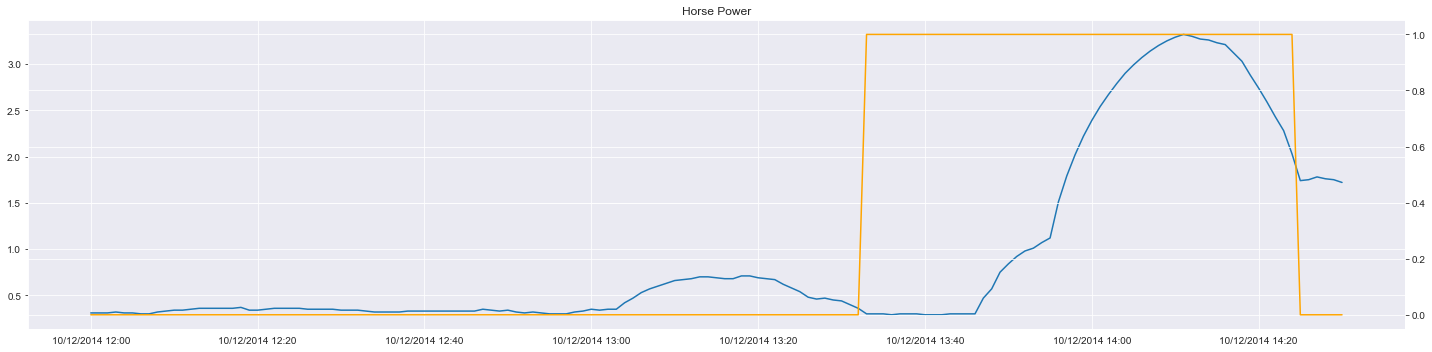

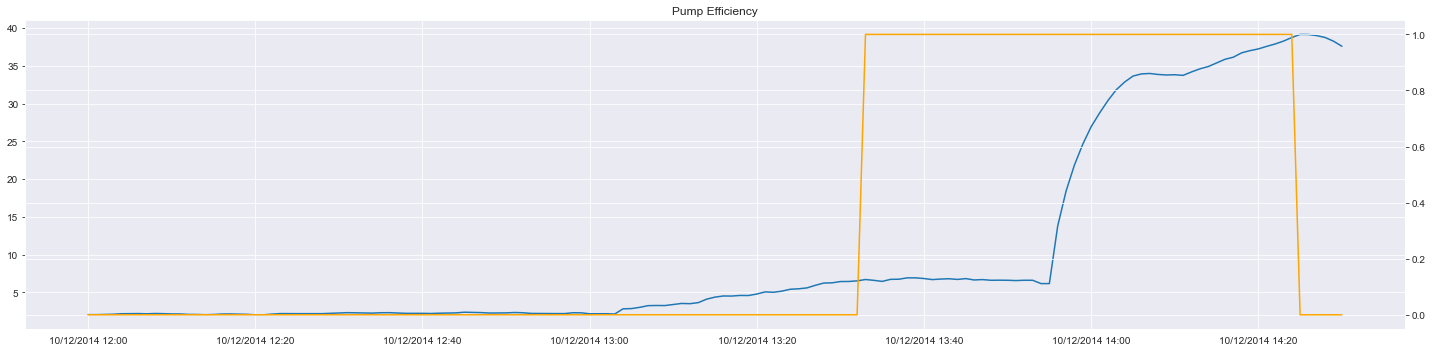

In [118]:
dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)', inplace=True)
dataframe_time_filtered = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 12:00") & (dataframe_stdev.index <= "10/12/2014 14:30")]

ListOfVariables=['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']
for item in ListOfVariables:
    fig,ax1=plt.subplots()
    ax1.plot(dataframe_time_filtered[item]) #Looping through every item in the dataframe.
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) #This will ensure we only plot a maximum of 10 Time Stamps
    ax2=ax1.twinx() 
    ax2.plot(dataframe_time_filtered['PUMP FAILURE (1 or 0)'],color='orange')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(item)
    fig.tight_layout()
    plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.

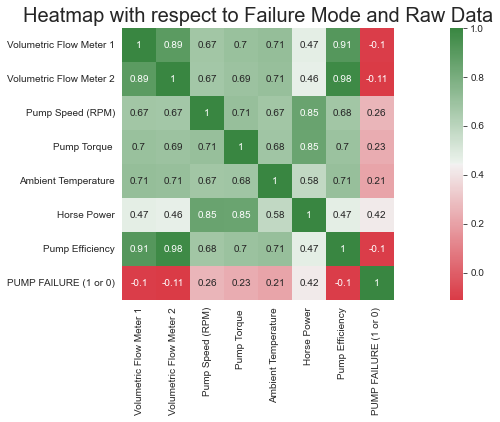

In [38]:
sns.heatmap(dataframe_raw.corr(), cmap=sns.diverging_palette(10, 130, as_cmap=True), annot=True, square=True)
plt.title("Heatmap with respect to Failure Mode and Raw Data", size=20)
plt.show()

**Which variables seem to correlate with Pump Failure?**

**Ans:** A correlation closer to -0.1 indicates that Volumetric Flow Meter 1, Volumetric Flow Meter 2 and Pump Efficiency are **negatively correlated** to Pump Failure.



### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> i) Using the correlated DataFrame you created earlier, create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order. </b>

In [45]:
dataframe_raw.corr()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


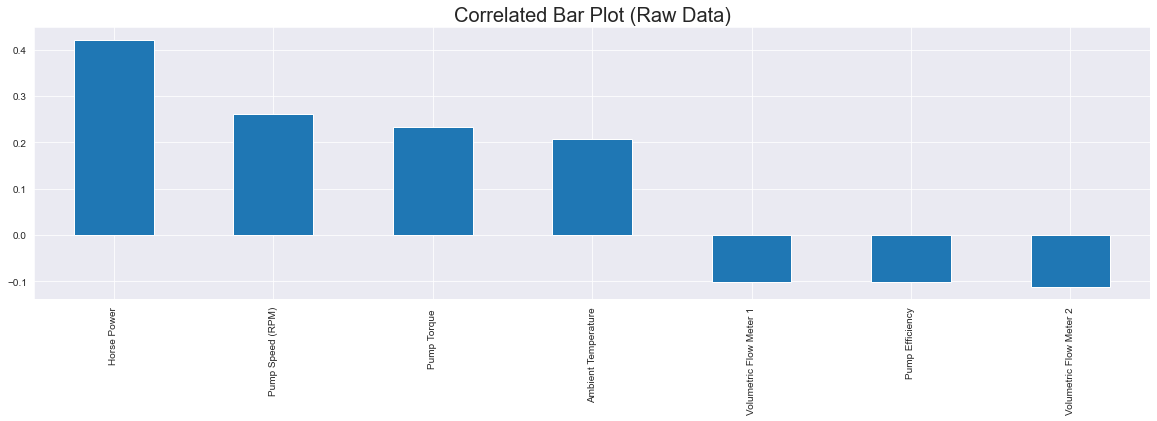

In [62]:
plotdata = dataframe_raw.corr().loc['PUMP FAILURE (1 or 0)'].sort_values(ascending=False)[1:]
plotdata.plot(kind="bar")
plt.title("Correlated Bar Plot (Raw Data)", size=20)
plt.show()

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap using the dataframe_stdev dataset you had imported in Step Two. 

<b> i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset. </b>


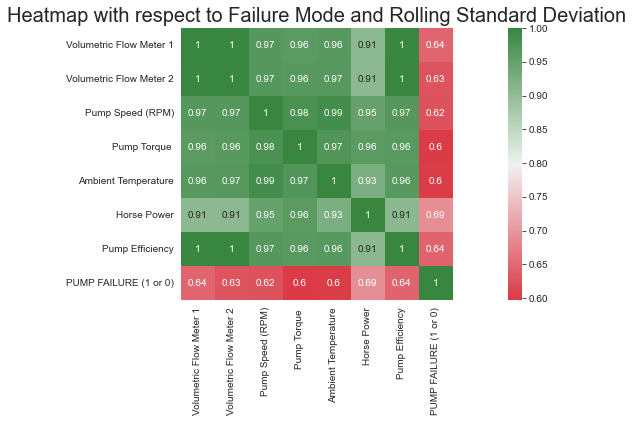

In [60]:
sns.heatmap(dataframe_stdev.corr(), cmap=sns.diverging_palette(10, 130, as_cmap=True), annot=True, square=True)
plt.title("Heatmap with respect to Failure Mode and Rolling Standard Deviation", size=20)
plt.show()

<b> Do any variables stand out? If yes, list these out below your heatmap. </b>

**Ans:** The  correlation closer to 1 indicates that **all variables are strongly positively correlated** to Pump Failure.

### Creating a Multivariate Regression Model


For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 13: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables in the dataframe_raw dataset. </b>

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. 

<b> ii) Repeat i) but this time use the dataframe_stdev you imported previously.</b>

You will repeat the same steps as you have done in i) only you will be changing the dataset from dataset_raw to dataset_stdev. 

In [80]:
#Dataframe_Raw
independent_variable_raw = dataframe_raw[['Volumetric Flow Meter 1','Volumetric Flow Meter 2',
                                      'Pump Speed (RPM)','Pump Torque ','Ambient Temperature',
                                      'Horse Power','Pump Efficiency']]
dependent_variable_raw = dataframe_raw['PUMP FAILURE (1 or 0)']
independent_variable_raw = sm.add_constant(independent_variable_raw)
regression_model_raw = sm.OLS(dependent_variable_raw,independent_variable_raw).fit()
print(regression_model_raw.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Thu, 18 Aug 2022   Prob (F-statistic):          5.58e-233
Time:                           17:01:55   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [5]:
#Dataframe_Stdev
independent_variable_stdev = dataframe_stdev[['Volumetric Flow Meter 1','Volumetric Flow Meter 2',
                                      'Pump Speed (RPM)','Pump Torque ','Ambient Temperature',
                                      'Horse Power','Pump Efficiency']]
dependent_variable_stdev = dataframe_stdev['PUMP FAILURE (1 or 0)']
independent_variable_stdev = sm.add_constant(independent_variable_stdev)
regression_model_stdev = sm.OLS(dependent_variable_stdev,independent_variable_stdev).fit()
print(regression_model_stdev.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                           17:44:01   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

<h4> <b> Compare the Models you've created and observe the R Squared displayed for each model. Which model seems better and why? Put your thoughts down below.  </b> If you're not sure how to answer this, you should reference the resource <a href = https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit> here </a> for a more detailed explanation.</h4>

    
**Ans:** The second **#Dataframe_Stdev** Model has an R-Squared value of 0.78. It means that 78% of values fit the regression analysis model. In other words, 78% of **the dependent variable** Pump Failure is explained by **the independent variables** like Volumetric Flow Meter 1, Volumetric Flow Meter 2, Pump Speed (RPM), Pump Torque, Ambient Temperature, Horse Power, and Pump Efficiency.


### Step 14: <span style="color:purple">Analysis of Coefficients </span>

Great job creating those regressive equations! You've reached the final two steps of this case study!

You've identified that *one* regressive model has a better fit than the previous model.

Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

<b> i) Using the .params method, extract the Coefficients from your regression_model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. Which three (3) variables seem to showcase the
strongest 'relationship' with respect to Pump Failure? </b>

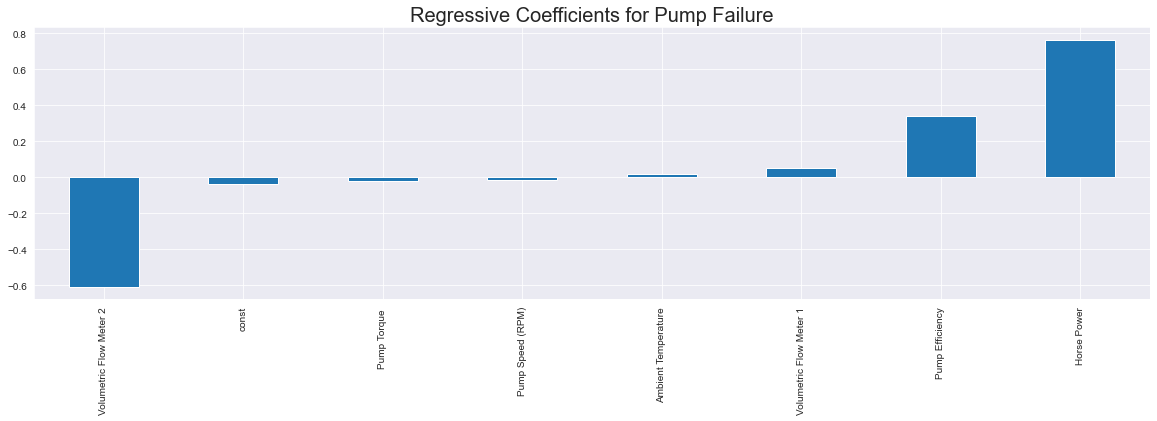

In [82]:
reg_coef = regression_model_stdev.params.sort_values(ascending=True)
reg_coef.plot(kind="bar")
plt.title("Regressive Coefficients for Pump Failure", size=20)
plt.show()


### Step 15: <span style="color:purple">Validate Predictions</span> 

Now it's time for us to validate our predictions.

<b>
i) Create a new column in the dataframe_stdev, called, 'Prediction'. 
    
ii) Use the regression equation you created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset so you get a column full of your regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
        Axes two would contain: Pump Failure (1 or 0) and Prediction
</b>

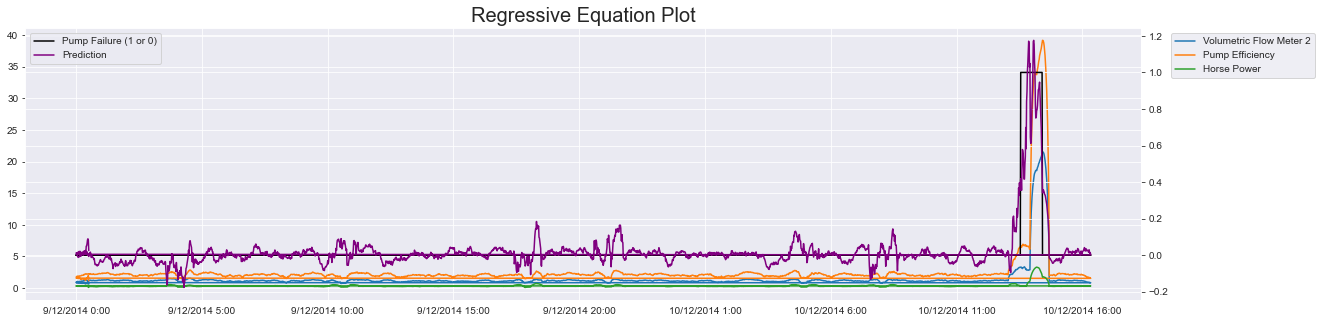

In [6]:
dataframe_stdev['Prediction']=regression_model_stdev.predict(independent_variable_stdev)
dataframe_stdev

dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)', inplace=True)

fig,ax1=plt.subplots()
ax1.plot(dataframe_stdev[['Volumetric Flow Meter 2']], label="Volumetric Flow Meter 2")
ax1.plot(dataframe_stdev[['Pump Efficiency']], label="Pump Efficiency")
ax1.plot(dataframe_stdev[['Horse Power']], label="Horse Power")
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax2=ax1.twinx()
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], color="black", label="Pump Failure (1 or 0)")
ax2.plot(dataframe_stdev['Prediction'], color="purple", label="Prediction")
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title("Regressive Equation Plot", size=20)
ax1.legend(bbox_to_anchor=(1.16, 1.0))
ax2.legend(loc="upper left")
plt.show()

<h3>Conclusion:</h3>


With the help of Exploratory Data Analysis( Descriptive Statistical Analysis) and Multivariate Regression Model(Inferential Statistical Analysis), we were able to identify variance in dataset(outliers). To give some uniformlity to the data we calculated rolling standared deviation with the interval of 30. We then calculated Correlation coefficient and compared R-squared values for each pump with respect to Pump Failure(1,0). We used those correlation coefficient values to calculate Multivariate Regression Model by using OLS Model from Statistical models. Which helped us to predict the failure signals and then we used .predict() function to make prediction for failure signal and compare it with the actual failure signals.

By looking at the plots of the above statistical analysis we were able to identify prefailure signals and actual failure signals for each individual dependent variables(Pump readings) w.r.t. its independent variables i.e. Pump Failure(0,1). R-squared value for raw data (0.362) and rolling standard deviation data (0.778) suggest that , Creating a regression model for rolling standard deviation data will show higher correlation towards pump failure. R-squared value of all 8 variables when modeled against independent variable Pump Failure (0,1) indicates that Horse Power(0.76), Pump Efficiency(0.34),Volumetric Flow Meter 1(0.051) have higher correlation coefficient indicating highly correlated to pump failure. Hence, Southern Water Corp should shift their attention on identifying the reasons for those pump failure and and take preventive actions.